In [19]:
!pip install ultralytics

In [2]:
# !pip install sahi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 19.2 MB/s eta 0:00:0000:0100:01
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117031 sha256=dba7ca4d7dd301db62e84401064ad28bedce38d449a4695b74709c0448a7758b
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [20]:
from ultralytics import YOLO
import torch

In [19]:
from datasets import load_dataset
ds = load_dataset("keremberke/football-object-detection")
len(ds['train']['image_id'])

859

In [20]:
import os 
dirs=['data/images/train',
'data/images/test',
'data/labels/train',
'data/labels/test']

for d in dirs:
    os.makedirs(d, exist_ok=True)

In [21]:
ds['train']

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 859
})

In [31]:
ds['train'][0]['objects']

{'id': [12553,
  12554,
  12555,
  12556,
  12557,
  12558,
  12559,
  12560,
  12561,
  12562,
  12563,
  12564,
  12565,
  12566,
  12567,
  12568,
  12569,
  12570,
  12571,
  12572,
  12573,
  12574,
  12575],
 'area': [1992,
  2653,
  1764,
  1359,
  1211,
  1661,
  1677,
  1481,
  1054,
  1490,
  1415,
  1675,
  1413,
  1389,
  119,
  1369,
  1225,
  854,
  1188,
  1305,
  1272,
  1456,
  2820],
 'bbox': [[80.0, 356.0, 33.18000030517578, 60.060001373291016],
  [351.0, 381.0, 44.18000030517578, 60.060001373291016],
  [467.0, 392.0, 27.559999465942383, 64.0199966430664],
  [516.0, 377.0, 21.229999542236328, 64.0199966430664],
  [589.0, 107.0, 23.579999923706055, 51.369998931884766],
  [596.0, 383.0, 25.950000762939453, 64.0199966430664],
  [632.0, 389.0, 29.889999389648438, 56.11000061035156],
  [677.0, 386.0, 24.350000381469727, 60.849998474121094],
  [720.0, 222.0, 19.6200008392334, 53.7400016784668],
  [729.0, 334.0, 25.149999618530273, 59.27000045776367],
  [784.0, 337.0, 26.73

In [22]:
for d in ds['train']:
    with open(f"data/labels/train/{d['image_id']}.txt", 'w') as file:
    # Write some text to the file
#     file.write(d['objects'][''])
        for i in range(len(d['objects']['bbox'])):
            x_min, y_min, width, height = d['objects']['bbox'][i]
            cat_id = d['objects']['category'][i]

            # Normalize the coordinates
            x_center = (x_min + width / 2) / d['width']
            y_center = (y_min + height / 2) / d['height']
            width_norm = width / d['width']
            height_norm = height / d['height']
            line = f"{cat_id} {x_center:.6f} {y_center:.6f} {width_norm:.6f} {height_norm:.6f}\n"
            file.write(line)
    d['image'].save(f"data/images/train/{d['image_id']}.jpg", format='JPEG')
for d in ds['test']:
    with open(f"data/labels/test/{d['image_id']}.txt", 'w') as file:
        for i in range(len(d['objects']['bbox'])):
            x_min, y_min, width, height = d['objects']['bbox'][i]
            cat_id = d['objects']['category'][i]

            # Normalize the coordinates
            x_center = (x_min + width / 2) / d['width']
            y_center = (y_min + height / 2) / d['height']
            width_norm = width / d['width']
            height_norm = height / d['height']
            line = f"{cat_id} {x_center:.6f} {y_center:.6f} {width_norm:.6f} {height_norm:.6f}\n"
            file.write(line)
    d['image'].save(f"data/images/test/{d['image_id']}.jpg", format='JPEG')

In [23]:
train_img=(os.listdir('data/images/train'))
test_img=(os.listdir('data/images/test'))
train_label=(os.listdir('data/labels/train'))
test_label=(os.listdir('data/labels/test'))
print(len(train_img), len(train_label))
print(len(test_img), len(test_label))

859 859
130 130


In [10]:
import cv2
import numpy as np
import os
from glob import glob

def zoom_image(image, zoom_factor=1.2):
    height, width = image.shape[:2]
    center_x, center_y = width // 2, height // 2
    new_width, new_height = int(width / zoom_factor), int(height / zoom_factor)
    x1 = max(center_x - new_width // 2, 0)
    x2 = min(center_x + new_width // 2, width)
    y1 = max(center_y - new_height // 2, 0)
    y2 = min(center_y + new_height // 2, height)
    cropped_image = image[y1:y2, x1:x2]
    zoomed_image = cv2.resize(cropped_image, (width, height))
    return zoomed_image, x1, x2, y1, y2

def update_annotations(annotation_file, zoom_factor, x1, x2, y1, y2, image_width, image_height):
    new_annotations = []
    with open(annotation_file, 'r') as file:
        for line in file:
            parts = line.strip().split()
            label = parts[0]
            x_center, y_center, width, height = map(float, parts[1:])
            
            # Convert from normalized coordinates to pixel coordinates
            x_center = x_center * image_width
            y_center = y_center * image_height
            width = width * image_width
            height = height * image_height
            
            # Adjust bounding box coordinates based on zoom
            x_center = (x_center - x1) / (x2 - x1) * image_width
            y_center = (y_center - y1) / (y2 - y1) * image_height
            width = width / (x2 - x1) * image_width
            height = height / (y2 - y1) * image_height
            
            # Convert back to normalized coordinates
            x_center = min(max(x_center / image_width, 0.0), 1.0)
            y_center = min(max(y_center / image_height, 0.0), 1.0)
            width = min(max(width / image_width, 0.0), 1.0)
            height = min(max(height / image_height, 0.0), 1.0)
            
            new_annotations.append(f"{label} {x_center} {y_center} {width} {height}")
    
    return new_annotations

def augment_dataset(root_dir, zoom_factor):
    # Define directories
    image_dirs = [os.path.join(root_dir, 'images', 'train'), os.path.join(root_dir, 'images', 'test')]
    label_dirs = [os.path.join(root_dir, 'labels', 'train'), os.path.join(root_dir, 'labels', 'test')]
    
    for img_dir, lbl_dir in zip(image_dirs, label_dirs):
        # Process images
        image_paths = glob(os.path.join(img_dir, '*.jpg'))
        for image_path in image_paths:
            # Read image
            image = cv2.imread(image_path)
            zoomed_image, x1, x2, y1, y2 = zoom_image(image, zoom_factor)
            
            # Save zoomed image (overwrite the original)
            cv2.imwrite(image_path, zoomed_image)
            
            # Update annotation file
            annotation_file = image_path.replace(img_dir, lbl_dir).replace('.jpg', '.txt')
            if os.path.exists(annotation_file):
                new_annotations = update_annotations(annotation_file, zoom_factor, x1, x2, y1, y2, image.shape[1], image.shape[0])
                with open(annotation_file, 'w') as file:
                    for annotation in new_annotations:
                        file.write(annotation + '\n')

# Define root directory
root_dir = '/kaggle/working/data'  # Replace with the path to your dataset root directory

# Apply augmentation
augment_dataset(root_dir, zoom_factor=1.42)


In [24]:
text = """
path: data
train: images/train
val: images/test

# Classes
nc: 2
names: ['player','ball']
"""
with open("data/dataset.yaml", 'w') as file:
    file.write(text)

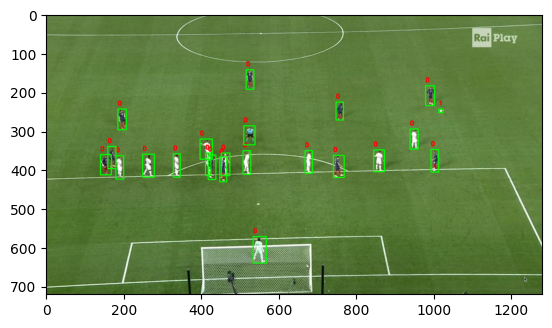

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def read_annotations(annotation_file):
    annotations = []
    with open(annotation_file, 'r') as file:
        for line in file:
            parts = line.strip().split()
            label = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            annotations.append((label, x_center, y_center, width, height))
    return annotations

def draw_boxes_on_image(image, annotations):

    height, width = image.shape[:2]

    for annotation in annotations:
        label, x_center, y_center, w, h = annotation
        
        # Convert normalized coordinates to pixel values
        x_center_px = int(x_center * width)
        y_center_px = int(y_center * height)
        w_px = int(w * width)
        h_px = int(h * height)
        
        # Calculate the coordinates of the bounding box
        x1 = int(x_center_px - w_px / 2)
        y1 = int(y_center_px - h_px / 2)
        x2 = int(x_center_px + w_px / 2)
        y2 = int(y_center_px + h_px / 2)
        
        # Draw the bounding box
        color = (0, 255, 0)  # Green color for the bounding box
        thickness = 2  # Thickness of the bounding box lines
        cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)
        
        # Draw the label
        label_text = str(label)
        font_scale = 0.5
        font_color = (0, 0, 255)  # Red color for the label text
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image, label_text, (x1, y1 - 10), font, font_scale, font_color, thickness)
    
    return image

# Example paths
image_path = 'data/images/train/174.jpg'  # Replace with your image path
annotation_file_path = 'data/labels/train/174.txt'  # Replace with your annotation file path

# Load the image
image = cv2.imread(image_path)

# Read annotations from file
annotations = read_annotations(annotation_file_path)

# Draw the bounding boxes on the image
image_with_boxes = draw_boxes_on_image(image, annotations)

image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('on')  # Turn off axis
plt.show()

In [12]:
# del model
# model=YOLO('yolov8s.pt')
model=YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 290MB/s]


In [13]:
import wandb
wandb.login(key='e3ef3658d4c2e7f75e463b9f36a9cb2c1e4c2d9d')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
model.tune(data='data/dataset.yaml', epochs=5, iterations=10, optimizer="AdamW", plots=False, save=False, val=False, device=[0,1], imgsz=1344)

In [15]:
import yaml
# cfg = '/kaggle/working/runs/detect/tune/best_hyperparameters.yaml'
# cfg='/kaggle/input/hypparams/best_hyperparameters (1).yaml'
cfg='new-hypp/best_hyperparameters (3).yaml'
with open(cfg, "r") as stream:
    try:
        cfg_args = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [16]:
# hyp='/kaggle/working/runs/detect/tune3/best_hyperparameters.yaml'
model.train(data='data/dataset.yaml', epochs=85,  device=[0,1], **cfg_args, imgsz=1344)

Ultralytics YOLOv8.2.76 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
                                                      CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/data/dataset.yaml, epochs=85, time=None, patience=100, batch=16, imgsz=1344, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

100%|██████████| 755k/755k [00:00<00:00, 28.0MB/s]
2024-08-12 09:22:27,341	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-12 09:22:28,054	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

wandb: Currently logged in as: danial-sakhpantayev (nothingreally). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.17.4
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240812_092251-ebyh8awe
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train
wandb: ⭐️ View project at https://wandb.ai/nothingreally/YOLOv8
wandb: 🚀 View run at https://wandb.ai/nothingreally/YOLOv8/runs/ebyh8awe


Overriding model.yaml nc=80 with nc=2
Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 128MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train... 859 images, 1 backgrounds, 0 corrupt: 100%|██████████| 859/859 [00:00<00:00, 1075.57it/s]


train: New cache created: /kaggle/working/data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/data/labels/test... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<00:00, 1063.02it/s]


val: New cache created: /kaggle/working/data/labels/test.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1344 train, 1344 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 85 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/85      15.5G      1.303      1.251      1.118        171       1344: 100%|██████████| 54/54 [01:05<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]


                   all        130       2405      0.877      0.533      0.591      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/85      14.3G       1.14     0.7572      1.058        225       1344: 100%|██████████| 54/54 [01:04<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405      0.865       0.64       0.67      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/85      15.1G      1.143     0.7189      1.045        182       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]


                   all        130       2405      0.786      0.564      0.617      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/85      14.6G      1.109      0.686      1.037        239       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405       0.86      0.642      0.689       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/85      14.4G      1.083     0.6769      1.033        194       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.909      0.629      0.717      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/85      14.6G      1.081     0.6647      1.037        186       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.911      0.619      0.703      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/85      14.1G      1.079      0.656       1.03        179       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]


                   all        130       2405      0.913       0.65      0.729       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/85      14.4G      1.049      0.638      1.026        183       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.837      0.656      0.709      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/85      14.3G      1.063     0.6565      1.047        146       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.946      0.643      0.717      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/85      14.5G      1.058     0.6343      1.038        189       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.946      0.631      0.707      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/85      14.3G       1.06      0.627      1.034        162       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.947      0.636      0.716      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/85      14.1G      1.017      0.614      1.019        236       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]


                   all        130       2405      0.902      0.624      0.704       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/85      14.7G      1.037     0.6177      1.033        171       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.895      0.645      0.701      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/85      14.2G      1.017     0.5997      1.016        103       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.911      0.652      0.704      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/85      14.4G      1.022     0.6026      1.009        207       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]


                   all        130       2405       0.93      0.649      0.718      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/85      14.3G      1.024     0.6065      1.017        128       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.946      0.642       0.71      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/85      14.4G      1.021     0.5869     0.9984        173       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.942      0.653      0.732       0.47


  0%|          | 0/54 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/85        14G     0.9853     0.5866      1.005        248       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405       0.87      0.656      0.723       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/85      14.4G      1.013     0.6002      1.015        194       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.904      0.677       0.73      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/85      14.1G     0.9846       0.59      1.016        128       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.926      0.661      0.729      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/85      14.2G     0.9755     0.5763     0.9996        183       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]


                   all        130       2405      0.914      0.653      0.725      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/85        14G     0.9853     0.5849      1.015        277       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.882      0.654      0.706      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/85      14.3G     0.9783     0.5688     0.9959        149       1344: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405      0.922      0.664      0.724      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/85      14.4G      0.979     0.5653     0.9999        206       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405      0.949       0.66      0.733      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/85      14.1G     0.9776     0.5752     0.9985        150       1344: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.896      0.681      0.743      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/85      14.4G     0.9604     0.5585     0.9989        137       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.25it/s]


                   all        130       2405      0.934       0.66      0.727      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/85      14.1G     0.9751     0.5655      1.002        264       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.926       0.67      0.738      0.472


  0%|          | 0/54 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/85      14.3G     0.9621     0.5536     0.9914        134       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]


                   all        130       2405      0.928      0.681      0.734      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/85      14.3G     0.9418      0.548     0.9856        209       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.938      0.672      0.742      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/85      15.1G     0.9422     0.5395     0.9754        279       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]


                   all        130       2405      0.942      0.667      0.734      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/85      14.3G     0.9483     0.5423     0.9812        214       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405      0.934      0.679       0.75      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/85      14.7G     0.9367     0.5396     0.9794        162       1344: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.909      0.689      0.753      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/85      14.3G     0.9304      0.566     0.9935        151       1344: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.941      0.661      0.746      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/85        14G     0.9379     0.5488     0.9846        224       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405       0.94      0.662      0.738      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/85      14.3G     0.9207     0.5244     0.9751        254       1344: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.949      0.678      0.748      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/85        14G     0.8998     0.5279     0.9698        182       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.938      0.673      0.741      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/85      14.3G      0.914     0.5273     0.9836        113       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.961      0.651      0.736      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/85      14.5G     0.9078     0.5303      0.976        165       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.959      0.664      0.733      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/85      14.3G     0.8859     0.5114     0.9626        221       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405      0.946       0.68       0.74      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/85      14.1G     0.8971     0.5117     0.9639        296       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]


                   all        130       2405      0.946      0.681      0.757      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/85      14.2G     0.8776     0.5133     0.9673        231       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.932      0.676      0.743      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/85      14.7G     0.8867     0.5146     0.9663        174       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]


                   all        130       2405      0.951       0.67       0.73      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/85      14.1G     0.8868     0.5149     0.9652        203       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]


                   all        130       2405      0.933      0.686      0.741      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/85      14.6G     0.8861     0.5012     0.9606        270       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.945      0.671      0.731      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/85      14.4G     0.8781     0.5068     0.9632        126       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.946      0.677      0.752      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/85      14.6G     0.8718     0.5034     0.9601        140       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.896      0.688      0.738       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/85      14.2G     0.8596     0.4863     0.9531        127       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.944      0.679      0.751      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/85      14.2G      0.857     0.4885     0.9577        148       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405      0.954      0.682      0.746      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/85      14.4G     0.8599     0.4872     0.9525        151       1344: 100%|██████████| 54/54 [01:02<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.962      0.684      0.748      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/85      14.2G     0.8388     0.4837     0.9552        256       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.26it/s]


                   all        130       2405       0.94      0.678      0.748      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/85      13.9G     0.8487       0.48     0.9533        208       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.26it/s]


                   all        130       2405      0.952       0.68      0.755       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/85      14.3G     0.8644     0.4901     0.9536        146       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]


                   all        130       2405      0.942      0.689      0.745      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/85      14.4G     0.8422     0.4809     0.9415        255       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.962      0.675      0.754      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/85      14.6G     0.8393     0.4738     0.9496        144       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.916        0.7       0.75      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/85      14.3G     0.8353     0.4727     0.9433        185       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405       0.95      0.683      0.752       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/85      14.5G     0.8285     0.4772       0.95        230       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.935       0.68      0.747      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/85      14.4G     0.8238      0.466     0.9472        143       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405      0.953      0.683       0.76      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/85      14.6G      0.808     0.4597     0.9332        233       1344: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        130       2405      0.957      0.682      0.752      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/85      14.2G     0.8233     0.4655     0.9477        178       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]


                   all        130       2405      0.943      0.679      0.753      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/85      14.8G     0.8136      0.464     0.9466        143       1344: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.945      0.684      0.743      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/85      14.3G        0.8     0.4538     0.9323        161       1344: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405       0.96      0.664      0.744      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/85      14.1G     0.7911     0.4534     0.9281        252       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.947      0.671      0.745      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/85      14.4G      0.802     0.4519     0.9382        237       1344: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.948      0.671      0.741      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/85      14.4G     0.7783     0.4397     0.9213        217       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]


                   all        130       2405       0.96      0.677      0.753       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/85      14.3G      0.779     0.4451     0.9326        214       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.26it/s]


                   all        130       2405      0.955      0.679      0.748      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/85      14.3G     0.7678     0.4401     0.9284        169       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.957      0.677      0.748      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/85      14.3G     0.7804     0.4379     0.9198        212       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.942      0.675      0.743      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/85        14G     0.7756     0.4332     0.9195        191       1344: 100%|██████████| 54/54 [01:02<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405       0.95      0.671      0.743      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/85      14.3G     0.7848     0.4402     0.9292        138       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405      0.951      0.677      0.751      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/85      14.3G     0.7749     0.4366     0.9297        234       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.943      0.668       0.74      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/85        14G     0.7799     0.4268     0.9289        186       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.954      0.666      0.741      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/85      14.4G     0.7565     0.4213     0.9177        229       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.927      0.681      0.751      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/85      14.4G     0.7439     0.4154     0.9159        158       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.25it/s]


                   all        130       2405      0.915      0.705      0.757      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/85      14.4G     0.7376     0.4138     0.9207        183       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.942      0.688      0.758      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/85      14.3G     0.7405     0.4166     0.9173        107       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.942       0.68      0.749      0.492
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
      76/85      15.1G     0.7078     0.3703     0.8937         85       1344: 100%|██████████| 54/54 [01:03<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]


                   all        130       2405      0.957      0.682      0.744      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/85      14.8G     0.6852     0.3536      0.884         68       1344: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.951      0.676       0.74       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/85      15.1G     0.6934     0.3503      0.889        123       1344: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]


                   all        130       2405      0.946      0.677      0.749      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/85      14.4G      0.686     0.3518     0.8856        120       1344: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        130       2405      0.939       0.68       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/85      15.1G     0.6712     0.3445     0.8803         81       1344: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]


                   all        130       2405      0.949      0.673      0.752      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/85      14.8G     0.6665     0.3391     0.8801         82       1344: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405       0.94       0.68      0.749      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/85      15.1G     0.6675     0.3435     0.8768         94       1344: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]


                   all        130       2405      0.946      0.674       0.75      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/85      14.8G     0.6568     0.3321     0.8839        119       1344: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        130       2405      0.944      0.683      0.748      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/85      15.1G     0.6507     0.3346     0.8734         78       1344: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]


                   all        130       2405      0.935      0.683      0.746      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/85      14.8G     0.6562     0.3398     0.8766         74       1344: 100%|██████████| 54/54 [01:01<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]


                   all        130       2405      0.926      0.688      0.748      0.496

85 epochs completed in 1.624 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
                                                      CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:14<00:00,  1.61s/it]


                   all        130       2405      0.946      0.674       0.75      0.498
                player        129       2268      0.971      0.844      0.918      0.678
                  ball         97        137       0.92      0.504      0.582      0.317
Speed: 0.4ms preprocess, 24.1ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▂▆▇▆▆▆▆▆▇▆▇▇▇█▇▇▇▇▇▇▇▇█▇███▇▇▇▇███▇████
wandb:     metrics/mAP50-95(B) ▁▁▅▅▄▅▅▅▆▆▅▆▆▆▇▇▇▆▇▇▇▇▇▇▇▇███▇█▇▇███▇███
wandb:    metrics/precision(B) ▅▁▆▆▇▇▅▇▄▇▅█▇▇▇▇██▇▇▇▅█▇▇▆█▇█▇█▇█▇▇█▇█▇▇
wandb:       metrics/recall(B) ▁▂▅▆▆▅▆▆▆��▆▆▆▇▇▆▇▆▇▇▇▇▇▇██▇▇▆▇▇▇▇▇▇▇▇▇▇▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
wandb:          train/dfl_loss █▆▆▅▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▄▃▃▃▃▃▃▃▃▃▃▃▂▃▂▂▁▁▁▁▁
wandb:            val/box_loss ██▆▄▅▅▄▅▅▃▄▃▄▃▃▁▂▄▂▂▁▂▁▁▂▁▂▂▁▁▁▂▂▁

In [12]:
model=YOLO('/kaggle/input/1280-img-sz/pytorch/default/1/best (2).pt')
# model=YOLO('/kaggle/input/newest-m/pytorch/default/1/best (4).pt')
# model=YOLO('/kaggle/input/yolov5/pytorch/default/1/yolov5.pt')
# model.train()

In [13]:
data_config = '/kaggle/working/data/dataset.yaml'
results = model.val(data=data_config, imgsz=1280, save=False)
print("Results:")
print(f"Precision: {results.preds['precision']}")
print(f"Recall: {results.preds['recall']}")
print(f"mAP50: {results.preds['map50']}")
print(f"mAP50-95: {results.preds['map50-95']}")
print(f"Loss: {results.preds['loss']}")
del results

Ultralytics YOLOv8.2.76 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]
val: Scanning /kaggle/working/data/labels/test... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<00:00, 1157.39it/s]

val: New cache created: /kaggle/working/data/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:18<00:00,  2.10s/it]


                   all        130       2405      0.905      0.859      0.896      0.613
                player        129       2268      0.969      0.987      0.991      0.799
                  ball         97        137      0.842       0.73      0.802      0.427
Speed: 4.5ms preprocess, 46.2ms inference, 0.0ms loss, 25.8ms postprocess per image
Results saved to runs/detect/val
Results:


AttributeError: 'DetMetrics' object has no attribute 'preds'. See valid attributes below.

    This class is a utility class for computing detection metrics such as precision, recall, and mean average precision
    (mAP) of an object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (tuple of str): A tuple of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (tuple of str): A tuple of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

In [ ]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
# model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# model=YOLO('/kaggle/input/1280-img-sz/pytorch/default/1/best (2).pt')
# Open the input video file
video_path = r"/kaggle/input/veo-footage/veo_footage.mp4"
cap = cv2.VideoCapture(video_path)

# Get the width, height, and frames per second (fps) of the input video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Create a VideoWriter object to save the processed video
output_path = r"/kaggle/working/processed_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
#     print(f'{frame} ksddjfsldnfjsdnflsdjkfn')
    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True, show=False, tracker="botsort.yaml", imgsz=1920, conf=0.2, line_width=1 )

        # Visualize the results on the frame
#         annotated_frame = results[0].plot()
        annotated_frame= results[0].plot(font_size=10, pil=True)

        # Write the annotated frame to the output video
        out.write(annotated_frame)

        # Optional: Display the annotated frame (if not in a Jupyter environment)
        # cv2.imshow("YOLOv8 Tracking", annotated_frame)
        # if cv2.waitKey(1) & 0xFF == ord("q"):
        #     break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()  # Uncomment if using cv2.imshow()


In [9]:
!pip install inference supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of awscli to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of awscli to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.9/570.9 kB 13.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.0/906.0 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

True

0: 640x1280 12 players, 1 ball, 57.1ms
Speed: 4.8ms preprocess, 57.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 1280)


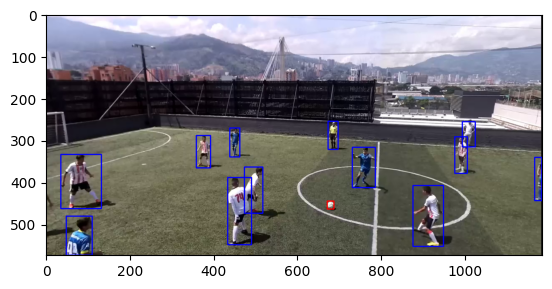

In [62]:
import cv2

# Path to the video file
video_path = 'veo.mp4'
output_image_path = 'first_frame.jpg'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Read the first frame
    success, frame = cap.read()
    print(success)
    if not success:
        frame_path='/kaggle/input/some-frame/Screenshot 2024-08-13 132040.png'
        frame=cv2.imread(frame_path)
        # Save the first frame as an image file
#         cv2.imwrite(output_image_path, frame)
        

model=YOLO('best (2).pt')
# frame_path='/kaggle/working/data/images/test/79.jpg'
# frame_path='/kaggle/input/some-frame/Screenshot 2024-08-13 132040.png'
# frame=cv2.imread(frame_path)
results=model.predict(frame)
for result in results:
    for box in result.boxes:
        label = int(box.cls.cpu())
        if label==1:color=(0,0,255) 
        else: color=(255,0,0)
        x1, y1, x2, y2 = map(int, box.xyxy[0].cpu())
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)

image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('on')  # Turn off axis
plt.show()

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = YOLO('best (2).pt')

# Input video path
video_path = 'half.mp4'
cap = cv2.VideoCapture(video_path)


frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))


fourcc = cv2.VideoWriter_fourcc(*'mp4v')

#location where processed mp4 would load 
output_path = 'processed_output.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# save id->color dict, so the players would have consistent coloring across frames
object_color_map = {}

ball_color = (0, 255, 0)  # color of bounding box
players_colors = np.empty((0, 3))#array to store all colors of players. Used for Kmeans 
centers = None

# Loop through the video frames
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break
    
    # Run YOLOv8 tracking on the frame
    results = model.track(frame, persist=True, show=False, tracker="botsort.yaml", imgsz=1344, conf=0.2, line_width=1, device=0)#specify device for inference
    img = frame.copy()

    # Extract grass color (if needed)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #boudaries for the green coloring. Needed to extract the field color
    lower_green = np.array([30, 40, 30])
    upper_green = np.array([80, 255, 115])

    #extracted field color is used to be extracted from the players
    mask = cv2.inRange(hsv, lower_green, upper_green)
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    grass_color = cv2.mean(img, mask=mask)[:3]
    grass_hsv = cv2.cvtColor(np.uint8([[list(grass_color)]]), cv2.COLOR_BGR2HSV)
    
    # Process each detected object
    kits_colors = []
    object_ids = []
    for box in results[0].boxes:
        label = int(box.cls.cpu())
        obj_id = int(box.id.cpu())  # Extract the object ID
        if label == 0:  #cropping the players
            x1, y1, x2, y2 = map(int, box.xyxy[0].cpu())
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(img.shape[1], x2), min(img.shape[0], y2)
            player_img = img[y1:y2, x1:x2]
            height, width = player_img.shape[:2]
            if player_img.size == 0:
                continue

            hsv = cv2.cvtColor(player_img, cv2.COLOR_BGR2HSV)
            lower_bound = np.array([grass_hsv[0, 0, 0] - 10, 20, 40])
            upper_bound = np.array([grass_hsv[0, 0, 0] + 20, 255, 255])
            mask = cv2.inRange(hsv, lower_bound, upper_bound)
            mask = cv2.bitwise_not(mask)
            
            #extracting upper half of player, as it contains more useful info about coloring
            upper_mask = np.zeros(player_img.shape[:2], np.uint8)
            upper_mask[0:player_img.shape[0]//2, 0:player_img.shape[1]] = 255
            mask = cv2.bitwise_and(mask, upper_mask)

            masked_img = cv2.bitwise_and(player_img, player_img, mask=mask)
            
            # For debug, show the cropped imgs of players

            # plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
            # plt.title(obj_id)
            # plt.show()
            
            player_kit_color = cv2.mean(player_img, mask=mask)[:3]#extracted coloring of player would be used for k means
            kits_colors.append(player_kit_color)
            object_ids.append(obj_id)  # Save object ID

    # Perform K-means clustering on collected colors
    if len(kits_colors) > 0:
        kits_colors = np.array(kits_colors)#it is later used as we iterate over every box in a frame
        a = kits_colors#concat it to entire array of colors
   
   #fix needed
        # if centers is None:
        #     distances = np.linalg.norm(kits_colors[:, np.newaxis] - kits_colors, axis=2)
        #     average_distances = np.mean(distances, axis=1)
        #     outlier_index = np.argmax(average_distances)
        #     a=np.delete(kits_colors, outlier_index, axis=0)
        if centers is not None: 
            distances = np.linalg.norm(kits_colors[:, np.newaxis] - centers, axis=2)
            mask = np.any(distances < 60, axis=1)#removing those elements who are more than 60 from centroids
            a = kits_colors[mask]
        players_colors = np.concatenate((players_colors, a), axis=0)
        players_colors = np.unique(players_colors, axis=0)#leaving only unique colorings. Not to have duplicates of players
        kits_kmeans = KMeans(n_clusters=2, random_state=0).fit(list(players_colors))
        centers = kits_kmeans.cluster_centers_
        idx = np.argsort(kits_kmeans.cluster_centers_.sum(axis=1))
        centers = centers[idx]#sorting the centers so that those centroids of smaller val, i.e. black color would alway be 0th index. It is later used for classification

        for obj_id, player_color in zip(object_ids, kits_colors):
            if obj_id not in object_color_map:
                if np.linalg.norm(centers[0] - player_color) < np.linalg.norm(centers[1] - player_color):#to which centroid player is closer, there he belong
                    object_color_map[obj_id] = (0, 0, 255)  # Red for one cluster
                else:
                    object_color_map[obj_id] = (255, 0, 0)  # Blue for another cluster
                print(np.linalg.norm(centers[0] - player_color), np.linalg.norm(centers[1] - player_color), obj_id)
                
                #value can be changed. If player_color is too far, remove, so not to  affect centroids of clusters
                if np.linalg.norm(centers[0] - player_color) >= 55 and np.linalg.norm(centers[1] - player_color) >= 55:
                    object_color_map[obj_id] = (0, 0, 0)
                    
        # Annotate frame with object IDs and colors
        for box in results[0].boxes:
            label = int(box.cls.cpu())
            obj_id = int(box.id.cpu())  # Extract the object ID
            x1, y1, x2, y2 = map(int, box.xyxy[0].cpu())
            if label == 0:  # Player
                color = object_color_map.get(obj_id, (0, 255, 255))  # Default color if ID not found
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                cv2.putText(img, f'player {obj_id}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
            else:  # Ball
                cv2.rectangle(img, (x1, y1), (x2, y2), ball_color, 2)
                cv2.putText(img, f'ball {obj_id}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, ball_color, 2)
    
    # Write the annotated frame to the output video
    out.write(img)

    # Display the annotated frame
    cv2.imshow('Video', img)
    
    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()
